In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [2]:
df=pd.read_csv('beerconsumer.csv', decimal=',')

In [3]:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [4]:
df2=df.dropna()

In [5]:
df2.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [6]:
from sklearn.preprocessing import MinMaxScaler 

In [7]:
scalar=MinMaxScaler()

In [8]:
df2['Consume Per litre']=scalar.fit_transform(df2[['Consumo de cerveja (litros)']])

c:\users\shavej shaikh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
c:\users\shavej shaikh\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
df2.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Consume Per litre
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,0.471221
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,0.620031
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,0.698101
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,0.655082
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,0.616979


In [10]:
normalday=df2[df2['Final de Semana']==0.0]
weekend=df2[df2['Final de Semana']==1.0]

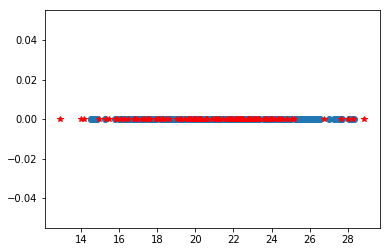

In [11]:
plt.plot(normalday['Temperatura Media (C)'],np.zeros_like(normalday['Temperatura Media (C)']),'o')
plt.plot(weekend['Temperatura Media (C)'],np.zeros_like(weekend['Temperatura Media (C)']),'*',color='red')

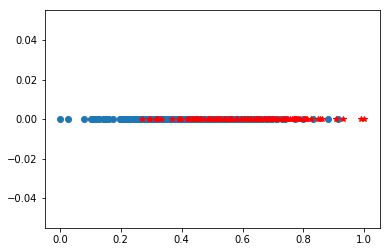

In [12]:
plt.plot(normalday['Consume Per litre'],np.zeros_like(normalday['Consume Per litre']),'o')
plt.plot(weekend['Consume Per litre'],np.zeros_like(weekend['Consume Per litre']),'*',color='red')

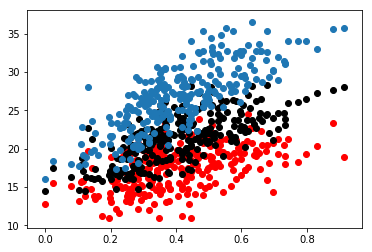

In [13]:
plt.scatter(normalday['Consume Per litre'],normalday['Temperatura Minima (C)'],color='red')
plt.scatter(normalday['Consume Per litre'],normalday['Temperatura Media (C)'],color='black')
plt.scatter(normalday['Consume Per litre'],normalday['Temperatura Maxima (C)'])

### Bivariate Analyses

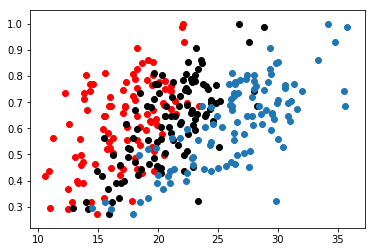

In [14]:
plt.scatter(weekend['Temperatura Minima (C)'],weekend['Consume Per litre'],color='red')
plt.scatter(weekend['Temperatura Media (C)'],weekend['Consume Per litre'],color='black')
plt.scatter(weekend['Temperatura Maxima (C)'],weekend['Consume Per litre'])

In [15]:
import seaborn as sn

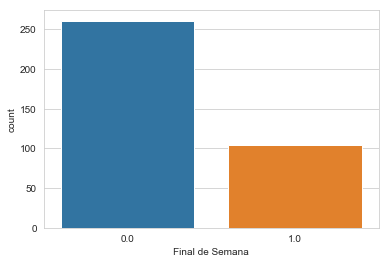

In [16]:
sn.set_style('whitegrid')
sn.countplot(x='Final de Semana',data=df)

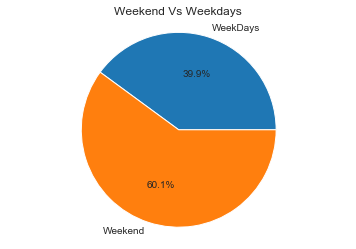

In [17]:
val=[]
n1=sum(normalday['Consume Per litre'])/5
val.append(n1)
n2=sum(weekend['Consume Per litre'])/2
val.append(n2)

my_labels ='WeekDays','Weekend'
plt.pie(val,labels=my_labels,autopct='%1.1f%%')
plt.title('Weekend Vs Weekdays')
plt.axis('equal')
plt.show()

In [18]:
from sklearn import linear_model

In [19]:
model=linear_model.LinearRegression()

In [20]:
df2.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Consume Per litre
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,0.471221
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,0.620031
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,0.698101
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,0.655082
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,0.616979


In [21]:
X=df2.drop(['Data','Consumo de cerveja (litros)','Consume Per litre'],axis='columns')

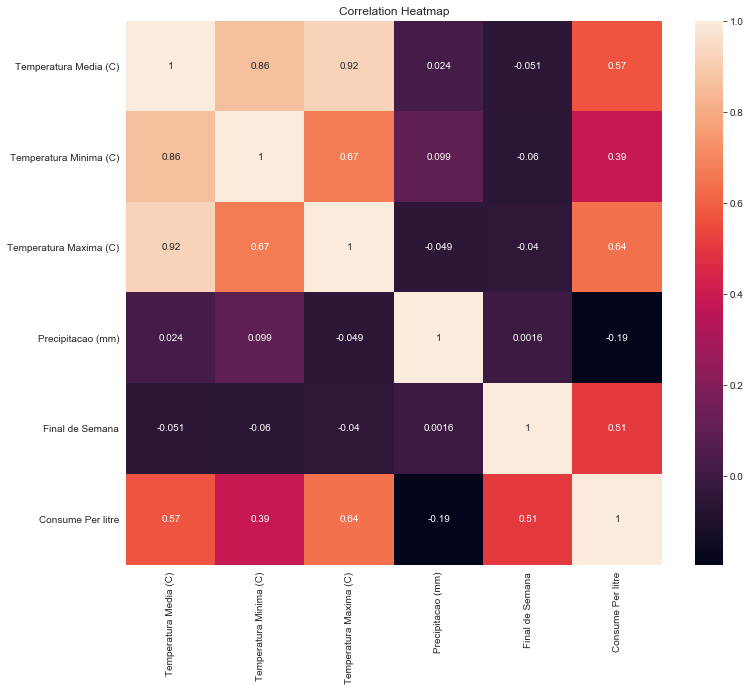

In [36]:
plt.figure(figsize=(12,10))
sn.heatmap(df2.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [22]:
X.count()

Temperatura Media (C)     365
Temperatura Minima (C)    365
Temperatura Maxima (C)    365
Precipitacao (mm)         365
Final de Semana           365
dtype: int64

In [23]:
df2.isna().sum()

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
Consume Per litre              0
dtype: int64

In [24]:
y=df2['Consume Per litre']

In [25]:
y.head()

0    0.471221
1    0.620031
2    0.698101
3    0.655082
4    0.616979
Name: Consume Per litre, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [28]:
x_train.count()

Temperatura Media (C)     292
Temperatura Minima (C)    292
Temperatura Maxima (C)    292
Precipitacao (mm)         292
Final de Semana           292
dtype: int64

In [29]:
x_test.count()

Temperatura Media (C)     73
Temperatura Minima (C)    73
Temperatura Maxima (C)    73
Precipitacao (mm)         73
Final de Semana           73
dtype: int64

In [30]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
model.score(x_test,y_test)

0.6641060998160409

In [32]:
model.predict(x_test[:10])

array([0.33238086, 0.64441984, 0.61317533, 0.34050338, 0.40685685,
       0.50990436, 0.31126358, 0.34213286, 0.18245452, 0.55912238])

In [33]:
y_test[:10]

255    0.292829
360    0.761380
199    0.768416
36     0.359329
168    0.431932
135    0.396669
138    0.418411
305    0.267229
188    0.233364
79     0.605578
Name: Consume Per litre, dtype: float64